In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
#import keras

%matplotlib inline  

In [4]:
ds_test = pd.read_csv("we_data/test.csv")
ds_train = pd.read_csv("we_data/train.csv")
ds_val = pd.read_csv("we_data/validation.csv")

In [13]:
#Aisha's 
#ds_test = pd.read_csv("/Users/aisha/desktop/AI/we_data/test.csv\")
#ds_train = pd.read_csv("/Users/aisha/desktop/AI/we_data/train.csv\")
#ds_val = pd.read_csv("/Users/aisha/desktop/AI/we_data/validation.csv\")

In [14]:
# Hend's
#ds_test = pd.read_csv("/Users/HendAlmalik/Documents/Term2/AI/CW/we_data/test.csv")
#ds_train = pd.read_csv("/Users/HendAlmalik/Documents/Term2/AI/CW/we_data/train.csv")
#ds_val = pd.read_csv("/Users/HendAlmalik/Documents/Term2/AI/CW/we_data/validation.csv")

# Dataset Info

## Training Data

In [8]:
df = ds_train

print('headers:', list(df))

print('size:', len(df))
df.head()

headers: ['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag']
size: 2430981


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [16]:
df.describe()

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.381152e+06,0.0,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,2.109685e+00,NaN,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,8.764370e-01,NaN,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,1.000000e+00,NaN,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,2.000000e+00,NaN,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,3.000000e+00,NaN,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,4.000000e+00,NaN,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [17]:
df.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

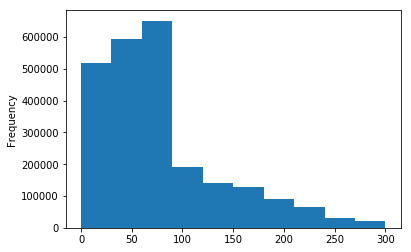

In [18]:
df['payprice'].plot.hist()

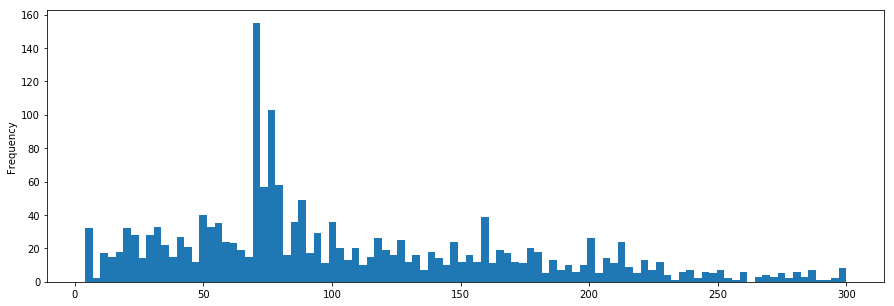

In [19]:
df[df['click'] == 1]['payprice'].plot.hist(bins=100, figsize=(15,5))

In [20]:
# Null values in dataset
df.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [21]:
pd.get_dummies(df['useragent'])

,android_chrome,android_firefox,android_ie,android_maxthon,android_opera,android_other,android_safari,android_sogou,ios_other,ios_safari,...,other_safari,windows_chrome,windows_firefox,windows_ie,windows_maxthon,windows_opera,windows_other,windows_safari,windows_sogou,windows_theworld
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


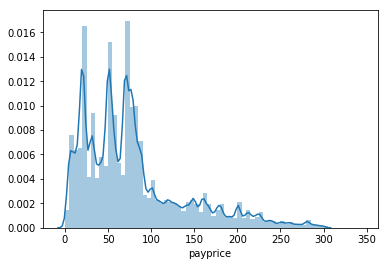

In [22]:
sns.distplot(df['payprice'], bins=list(range(0, 350, 5)))

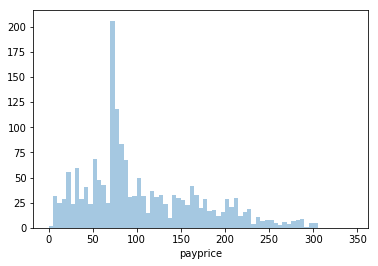

In [11]:
sns.distplot(df[df['click'] == 1]['payprice'], bins=list(range(0, 350, 5)), kde=False)

In [66]:
df_train['slotarea'] = df['slotheight'] * df['slotwidth']
df_train

,click,slotwidth,slotheight,0,1,2,255,FifthView,FirstView,FourthView,OtherView,SecondView,ThirdView,slotarea
0,0,160,600,0,0,1,0,0,0,0,0,0,0,96000
1,0,950,90,1,0,0,0,0,0,0,0,0,0,85500
2,0,300,250,0,0,1,0,0,0,0,0,0,0,75000
3,0,336,280,0,0,1,0,0,0,0,0,0,0,94080
4,0,200,200,0,1,0,0,0,0,0,0,0,0,40000
5,0,960,90,1,0,0,0,0,0,0,0,0,0,86400
6,0,336,280,1,0,0,0,0,0,0,0,0,0,94080
7,0,300,250,0,0,1,0,0,0,0,0,0,0,75000
8,0,336,280,0,0,1,0,0,0,0,0,0,0,94080
9,0,1000,90,1,0,0,0,0,0,0,0,0,0,90000


In [82]:
df_train = ds_train
df_train['slotarea'] = df_train['slotwidth'] * df_train['slotheight']
selected = [
    'click',
    'slotarea',
    'slotvisibility',
    'payprice',
]
df_train = df_train[selected]
slot_vis = pd.get_dummies(df_train['slotvisibility']).drop('Na', axis=1)
df_train = pd.concat([df_train, slot_vis],axis=1)
df_train.drop('slotvisibility', axis=1, inplace=True)
df_train.head()

,click,slotarea,payprice,0,1,2,255,FifthView,FirstView,FourthView,OtherView,SecondView,ThirdView
0,0,40000,5,0,0,1,0,0,0,0,0,0,0
1,0,75000,23,0,0,0,0,0,0,1,0,0,0
2,0,62500,24,0,0,1,0,0,0,0,0,0,0
3,0,96000,25,0,0,1,0,0,0,0,0,0,0
4,0,65520,133,0,0,0,0,0,0,0,1,0,0


In [77]:
# Train Data
x = df_train.drop('click', axis=1)
y = df_train['click']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)



In [78]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [79]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
prediction = logmodel.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    728773
           1       0.00      0.00      0.00       522

   micro avg       1.00      1.00      1.00    729295
   macro avg       0.50      0.50      0.50    729295
weighted avg       1.00      1.00      1.00    729295



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[91119,     0],
       [   59,     0]])

In [26]:
# Stats on impressions with clicks
max = df[df['click'] != 0]['payprice'].max()
min = df[df['click'] != 0]['payprice'].min()
x = df[df['click'] != 0]['payprice'].mean()
y = df[df['click'] != 0]['payprice'].std()
print(f"Mean {x}, std {y}, mean+std {x+y}, max {max}, min {min}")

Mean 105.46402677077523, std 66.39225768437046, mean+std 171.8562844551457, max 300, min 4


In [27]:
# Stats on bidprice and payprice for all impressions
for x in ['bidprice', 'payprice']:
    print('Average {0}: {1}'.format(x, df[x].mean()))
    print('Lowest {0}: {1}'.format(x, df[x].min()))
    print('Highest {0}: {1}'.format(x, df[x].max()))

Average bidprice: 272.9620461862927
Lowest bidprice: 227
Highest bidprice: 300
Average payprice: 78.15141623895867
Lowest payprice: 0
Highest payprice: 300


In [28]:
# Selection of useful fields per advertise
tmp1 = df[['click', 'bidprice', 'payprice', 'advertiser']].groupby('advertiser').sum()
# Calcuate impressions per advertiser
tmp2 = df[['click', 'bidprice', 'payprice', 'advertiser']].groupby('advertiser').size().reset_index(name='impressions')

# Joining the 2 dataframes
stats = tmp1.join(tmp2.set_index('advertiser'), on='advertiser')

# Calculate Click-Through Rate (CTR)
# https://en.wikipedia.org/wiki/Click-through_rate
stats['ctr'] = stats['click'] / stats['impressions'] * 100

# Calculate cost-per-mille (CPM) 
# - cost advertisers pay for 1k views or clicks
# https://en.wikipedia.org/wiki/Cost_per_mille
stats['cpm'] = stats['payprice'] / stats['impressions']

# Calculate effective cost-per-click (eCPC) 
# Cost to advertiser / number of clicks
stats['ecpc'] = stats['payprice'] / stats['click']

#######

#calculate constant bidding
stats['avg'] = stats['bidprice']/ stats['impressions']

#ccalculate total bidprice
total1 = stats['bidprice'].sum()
print ('Total bidprice=',total1)

#calculate total impression
total2 = stats['impressions'].sum()
print ('Total impressions=',total2)

#calculate constant bidding
cons = total1/total2
print('Constant bidding=',cons)

stats

Total bidprice= 663565548
Total impressions= 2430981
Constant bidding= 272.9620461862927


,click,bidprice,payprice,impressions,ctr,cpm,ecpc,avg
advertiser,,,,,,,,
1458,385,147705900,33968736,492353,0.078196,68.992646,88230.483117,300.000000
2259,43,38508376,12428238,133673,0.032168,92.974931,289028.790698,288.078939
2261,36,31701699,9873779,110122,0.032691,89.662184,274271.638889,287.877981
2821,131,61343675,18828044,211366,0.061978,89.077922,143725.526718,290.224894
2997,217,13802633,3129267,49829,0.435489,62.800116,14420.585253,277.000000
3358,202,61729738,22447231,264956,0.076239,84.720599,111124.905941,232.981091
3386,320,136512300,34931823,455041,0.070323,76.766320,109161.946875,300.000000
3427,272,95218860,30458711,402806,0.067526,75.616329,111980.555147,236.388882
3476,187,77042367,23918779,310835,0.060161,76.950083,127907.909091,247.856152


In [29]:
uniq_fields = [ x for x in (ds_train) if x not in list(ds_test)]

data = ds_val
print('Fields in training/validation, not in test:', uniq_fields)

print(f'''---Mean---
{data[uniq_fields].mean()}
---Max---
{data[uniq_fields].max()}
---Min---
{data[uniq_fields].min()}
''')

Fields in training/validation, not in test: ['click', 'bidprice', 'payprice']
---Mean---
click         0.000665
bidprice    273.053099
payprice     78.234005
dtype: float64
---Max---
click         1
bidprice    300
payprice    300
dtype: int64
---Min---
click         0
bidprice    227
payprice      0
dtype: int64



## Validation Data

In [30]:
print('headers:', list(ds_val))
print('size:', len(ds_val))
print('size click:', len(ds_val[ds_val['click'] == 1]))
ds_val.head()

headers: ['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag']
size: 303925
size click: 202


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [31]:
click = ds_val[ds_val['click'] == 1].payprice.values
click_prices = sorted(ds_val.payprice.values)

total = len(click_prices)
for i in range(np.max(click_prices)):
    win = [ x for x in click_prices if i >= x ]
    win_prob = len(win) / total
    print (f'bid: {i}, win_prob: {win_prob}, expected_expenditure: {sum(win) / 1000},'
           f'potential_click: {len([ x for x in click if i >= x])}') 

bid: 0, win_prob: 0.0002698034054454224, expected_expenditure: 0.0,potential_click: 0
bid: 1, win_prob: 0.0012272764662334457, expected_expenditure: 0.291,potential_click: 0
bid: 2, win_prob: 0.0028000329028543226, expected_expenditure: 1.247,potential_click: 0
bid: 3, win_prob: 0.0031027391626223576, expected_expenditure: 1.523,potential_click: 0
bid: 4, win_prob: 0.007159661100600477, expected_expenditure: 6.455,potential_click: 0
bid: 5, win_prob: 0.02577280579090236, expected_expenditure: 34.74,potential_click: 0
bid: 6, win_prob: 0.031665707000082255, expected_expenditure: 45.486,potential_click: 4
bid: 7, win_prob: 0.036532039154396644, expected_expenditure: 55.839,potential_click: 4
bid: 8, win_prob: 0.04071070165336843, expected_expenditure: 65.999,potential_click: 4
bid: 9, win_prob: 0.045103232705437195, expected_expenditure: 78.014,potential_click: 4
bid: 10, win_prob: 0.05407255079378136, expected_expenditure: 105.274,potential_click: 4
bid: 11, win_prob: 0.0610117627704203

bid: 94, win_prob: 0.7381031504483014, expected_expenditure: 10893.116,potential_click: 123
bid: 95, win_prob: 0.7430912231636094, expected_expenditure: 11037.136,potential_click: 125
bid: 96, win_prob: 0.7455885498066958, expected_expenditure: 11110.0,potential_click: 125
bid: 97, win_prob: 0.7474245290778975, expected_expenditure: 11164.126,potential_click: 126
bid: 98, win_prob: 0.7483820021386856, expected_expenditure: 11192.644,potential_click: 126
bid: 99, win_prob: 0.749925146006416, expected_expenditure: 11239.075,potential_click: 126
bid: 100, win_prob: 0.7559726906309122, expected_expenditure: 11422.875,potential_click: 127
bid: 101, win_prob: 0.763425187134984, expected_expenditure: 11651.64,potential_click: 128
bid: 102, win_prob: 0.7651591675577857, expected_expenditure: 11705.394,potential_click: 128
bid: 103, win_prob: 0.7678440404705108, expected_expenditure: 11789.442,potential_click: 128
bid: 104, win_prob: 0.7692851854898413, expected_expenditure: 11834.994,potential

bid: 183, win_prob: 0.9223262318006087, expected_expenditure: 18458.534,potential_click: 169
bid: 184, win_prob: 0.9230797071645965, expected_expenditure: 18500.67,potential_click: 169
bid: 185, win_prob: 0.924017438512791, expected_expenditure: 18553.395,potential_click: 170
bid: 186, win_prob: 0.9247182693098627, expected_expenditure: 18593.013,potential_click: 171
bid: 187, win_prob: 0.9254947766718763, expected_expenditure: 18637.145,potential_click: 171
bid: 188, win_prob: 0.9264292177346385, expected_expenditure: 18690.537,potential_click: 171
bid: 189, win_prob: 0.9273472073702393, expected_expenditure: 18743.268,potential_click: 171
bid: 190, win_prob: 0.9280579090236079, expected_expenditure: 18784.308,potential_click: 171
bid: 191, win_prob: 0.9290976392202024, expected_expenditure: 18844.664,potential_click: 171
bid: 192, win_prob: 0.930591428806449, expected_expenditure: 18931.832,potential_click: 171
bid: 193, win_prob: 0.9314008390227853, expected_expenditure: 18979.31,po

bid: 273, win_prob: 0.9916821584272436, expected_expenditure: 23056.656,potential_click: 199
bid: 274, win_prob: 0.9919881549724439, expected_expenditure: 23082.138,potential_click: 199
bid: 275, win_prob: 0.992241506950728, expected_expenditure: 23103.313,potential_click: 199
bid: 276, win_prob: 0.992531052068767, expected_expenditure: 23127.601,potential_click: 199
bid: 277, win_prob: 0.992784404047051, expected_expenditure: 23148.93,potential_click: 199
bid: 278, win_prob: 0.9930410463107675, expected_expenditure: 23170.614,potential_click: 199
bid: 279, win_prob: 0.9932121411532451, expected_expenditure: 23185.122,potential_click: 199
bid: 280, win_prob: 0.9937714896767295, expected_expenditure: 23232.722,potential_click: 199
bid: 281, win_prob: 0.9957094677963313, expected_expenditure: 23398.231,potential_click: 199
bid: 282, win_prob: 0.9959233363494283, expected_expenditure: 23416.561,potential_click: 200
bid: 283, win_prob: 0.9962326231800609, expected_expenditure: 23443.163,po

In [32]:
df = ds_val

# Joining the 2 dataframes
stats = tmp1.join(tmp2.set_index('advertiser'), on='advertiser')

# Calculate Click-Through Rate (CTR)
# https://en.wikipedia.org/wiki/Click-through_rate
stats['ctr'] = stats['click'] / stats['impressions'] * 100

# Calculate cost-per-mille (CPM) - cost advertisers pay for 1k views or clicks
# https://en.wikipedia.org/wiki/Cost_per_mille
stats['cpm'] = stats['payprice'] / stats['impressions']

# Calculate effective cost-per-click (eCPC) 
# Cost to advertiser / number of clicks
stats['ecpc'] = stats['payprice'] / stats['click'] / 1000

stats

,click,bidprice,payprice,impressions,ctr,cpm,ecpc
advertiser,,,,,,,
1458,385,147705900,33968736,492353,0.078196,68.992646,88.230483
2259,43,38508376,12428238,133673,0.032168,92.974931,289.028791
2261,36,31701699,9873779,110122,0.032691,89.662184,274.271639
2821,131,61343675,18828044,211366,0.061978,89.077922,143.725527
2997,217,13802633,3129267,49829,0.435489,62.800116,14.420585
3358,202,61729738,22447231,264956,0.076239,84.720599,111.124906
3386,320,136512300,34931823,455041,0.070323,76.766320,109.161947
3427,272,95218860,30458711,402806,0.067526,75.616329,111.980555
3476,187,77042367,23918779,310835,0.060161,76.950083,127.907909


# Problem 2-2: Random Bidding

In [33]:
df = ds_val

In [34]:
ds_val.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [35]:
sel_cols = ['click', 'payprice', 'advertiser']
df[sel_cols].head()

,click,payprice,advertiser
0,0,23,1458
1,0,75,3476
2,0,65,3358
3,0,6,3358
4,0,5,3476


In [36]:
print("Overall min: {0}, Overall max: {1}".format(df['payprice'].min(), df['payprice'].max()))

df_click_imp = df[df['click'] == 1]['payprice']

print("Clicked imps min: {0}, Clicked imps max: {1}".format(df_click_imp.min(), df_click_imp.max()))

Overall min: 0, Overall max: 300
Clicked imps min: 6, Clicked imps max: 300


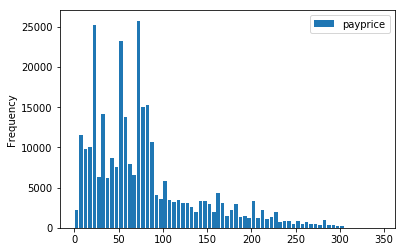

In [37]:
x = df[df['click'] == 1]['payprice']

# Get histogram of prices which gives impressions with clicks (in bins of 5)
df[['payprice']].plot(kind='hist', bins=list(range(0, 350, 5)),rwidth=0.8) 

## Generate test.csv bids 

In [38]:
import random
pd.options.mode.chained_assignment = None

def gen_random_bidfile(test_df, min_bid, max_bid, outfile='bids.csv'):
    tmp_df = test_df
    size = len(tmp_df)
    bids = [random.randint(min_bid, max_bid) for x in range(size)]
    tmp_df['bidprice'] = bids
    tmp_df[['bidid','bidprice']].to_csv(outfile, index=False)

for i in range(5):
    gen_random_bidfile(ds_val, 6, 300, f'bids_6_300.csv.{i}')

# Linear and Non-Linear Models

Reference: Lecture 4 slides

## Linear
- Logistic Regression
- Online Bayesian Probit Regression

## Non-Linear
- Gradient Boosting Decision Trees
- Factorisation Machines
- Combined Models
- Deep Neural Networks